A credit card is one of the most used financial products to make online purchases and
payments. Though the Credit cards can be a convenient way to manage your finances, they can
also be risky. Credit card fraud is the unauthorized use of someone else&#39;s credit card or credit
card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card
transactions so that customers are not charged for items that they did not purchase.
The dataset contains transactions made by credit cards in September 2013 by European
cardholders. This dataset presents transactions that occurred in two days, where we have 492
frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds)
account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.
Your focus in this project should be on the following: 
The following is recommendation of the steps that should be employed towards attempting to
solve this problem statement: 
 Exploratory Data Analysis: Analyze and understand the data to identify patterns,
relationships, and trends in the data by using Descriptive Statistics and Visualizations. 
 Data Cleaning: This might include standardization, handling the missing values and
outliers in the data. 
 Dealing with Imbalanced data: This data set is highly imbalanced. The data should be
balanced using the appropriate methods before moving onto model building.
 Feature Engineering: Create new features or transform the existing features for better
performance of the ML Models. 
 Model Selection: Choose the most appropriate model that can be used for this project. 
 Model Training: Split the data into train &amp; test sets and use the train set to estimate the
best model parameters. 
 Model Validation: Evaluate the performance of the model on data that was not used
during the training process. The goal is to estimate the model&#39;s ability to generalize to
new, unseen data and to identify any issues with the model, such as overfitting. 
 Model Deployment: Model deployment is the process of making a trained machine
learning model available for use in a production environment. 

Timeline 
We expect you to do your best and submit a solution within 2 weeks. 
Deliverables 

Please share the following deliverables in a zip file. 
 A report (PDF) detailing: 
 Description of design choices and Performance evaluation of the model 
 Discussion of future work 
 The source code used to create the pipeline 
 
Tasks/Activities List 
Your code should contain the following activities/Analysis: 
 Collect the time series data from the CSV file linked here. 
 Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing
values, outliers etc if any. 
 Get the correct datatype for date. 
 Balancing the data.
 Feature Engineering and feature selection. 
 Train/Test Split - Apply a sampling distribution to find the best split. 
 Choose the metrics for the model evaluation
 Model Selection, Training, Predicting and Assessment 
 Hyperparameter Tuning/Model Improvement 
 Model deployment plan. 
 
Success Metrics 
Below are the metrics for the successful submission of this case study. 
 The accuracy of the model on the test data set should be &gt; 75% (Subjective in nature) 
 Add methods for Hyperparameter tuning. 
 Perform model validation. 
 
Bonus Points 
 You can package your solution in a zip file included with a README that explains the
installation and execution of the end-to-end pipeline. 
 You can demonstrate your documentation skills by describing how it benefits our
company. 

Data:

The dataset for this project can be accessed by clicking the link provided below.
creditcard.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


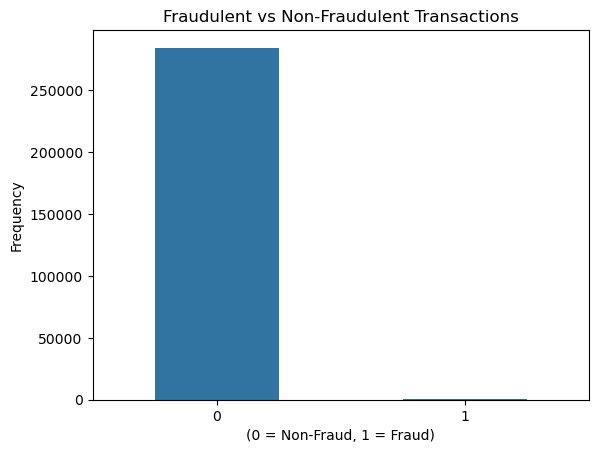

In [8]:
class_count = df['Class'].value_counts()

sns.barplot(x = class_count.index, y = class_count.values, width=0.5)
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('(0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Frequency')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [12]:
from sklearn.linear_model import LogisticRegression


logreg=LogisticRegression(random_state=42, max_iter=1000, C=0.01)


logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.01, max_iter=1000, random_state=42)

In [13]:
y_test_pred = logreg.predict(X_test)


print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy Score: 0.9974193321863699

Test Confusion Matrix:
 [[56729   135]
 [   12    86]]

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.88      0.54        98

    accuracy                           1.00     56962
   macro avg       0.69      0.94      0.77     56962
weighted avg       1.00      1.00      1.00     56962



In [14]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [15]:
y_test_pred = rf_model.predict(X_test)

print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy Score: 0.9995259997893332
Test Confusion Matrix:
 [[56850    14]
 [   13    85]]
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.87      0.86        98

    accuracy                           1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [37]:
import pickle 
with open('rf_model.pkl', 'wb') as file:
    
    pickle.dump(rf_model, file)